In [1]:
"""
Test module, making sure the main functionnalities are always functionning
"""
import unittest
from dubins import Dubins
from environment import StaticEnvironment
from dynamic_environment import DynamicEnvironment
from rrt import RRT
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm

class TestSum():

    def test_dubins():
        """
        Tests that the class Dubins initializes
        """
        Dubins(10, 1)
        print('Dubins OK')

    def test_environment():
        """
        Tests that the class Environment initializes and plots
        """

        env = StaticEnvironment((100, 100), 80)
        #env.plot(close=False)
        print('Static Environment OK')

    def test_rrt():
        env = StaticEnvironment((100, 100), 20)
        diameter = 10
        rrt = RRT(env, (5, 5, 1), diameter)
        env.plot(display=False)
        # Selection of random starting and ending points
        start = env.random_free_space()
        end = env.random_free_space()

        # Trying first the euclidian distance
        rrt.set_start(start)
        rrt.run(end, 200, metric='local')
        #env.plot(display=False)
        rrt.plot(file_name='static'+str(1)+'.png', close=False, nodes=True)

    def test_rrt_loop():
        """
        Function that plot graph of average RRT in different number of object
        """
        average = []
        diameter = 5
        total_iterations = 10 

        # Inizializza la barra di progresso
        progress_bar = tqdm(total=total_iterations)

        counter = 0
        while len(average) != 10:
            ad = None
            while ad is None:      
                env = StaticEnvironment((100, 100), 20)
                rrt = RRT(env, (5, 5, 1), diameter)
                #env.plot(display=False)
                # Selection of random starting and ending points
                start = env.random_free_space()
                end = env.random_free_space()
                
                # Trying first the local distance
                rrt.set_start(start)    
                ad = rrt.run(end, 100, metric='local')
            average.append(ad)
            progress_bar.update(1)
            progress_bar.display()
            #rrt.plot(nodes=True)
            #env.plot(display=False)
            #rrt.plot(file_name='static'+str(1)+'.png', close=False, nodes=True)
        print(average)
        progress_bar.reset()
        average_highDimSpace = []
        diameter=1
        while len(average_highDimSpace) != 10:
            ad = None
            while ad is None:
                env = StaticEnvironment((100, 100), 100)
                rrt = RRT(env, (5, 5, 1), diameter)
                #env.plot(display=False)
                # Selection of random starting and ending points
                start = env.random_free_space()
                end = env.random_free_space()

                # Trying first the local distance
                rrt.set_start(start)
                ad = rrt.run(end, 100, metric='local')

            average_highDimSpace.append(ad)   
            progress_bar.update(1)
            progress_bar.display()   
            #rrt.plot(nodes=True)
            #env.plot(display=False)
            #rrt.plot(file_name='static'+str(1)+'.png', close=False, nodes=True)
        print(average_highDimSpace)
        progress_bar.close()
        # x axis values
        x = [1,2,3,4,5,6,7,8,9,10]
        plt.plot(x, average, label = "Low dimensional")
        plt.plot(x, average_highDimSpace, label = "High dimensional")
        plt.xlabel('Epoch')
        plt.ylabel('Average')
        plt.title('Graph of average of path in different dimentional space')
        plt.legend()
        plt.show()

        print('Static RRT OK')

    def test_dynamic_env():
        """
        Tests that the RRT works in a dynamic environement
        """
        
        env = DynamicEnvironment((100, 100), 5)
        diameter = 5
        rrt = RRT(env, (5, 5, 1), diameter)
        start = (50, 1, 1.57)
        end = (50, 99, 1.57)

        # Initialisation of the tree, to have a first edge
        rrt.set_start(start)
        rrt.run(end, 200, metric='local')

        # Initialisation of the position of the vehicle
        position = start[:2]
        current_edge = rrt.select_best_edge()

        for i in range(300):
            # We check if we are on an edge or if we have to choose a new edge
            if not current_edge.path:
                current_edge = rrt.select_best_edge()
            # Update the position of the vehicle
            position = current_edge.path.popleft()
            # Update the environment
            #   The frontiers of the sampling and the obstacles
            env.update(position)
            #   The position of the goal
            end = (50, position[1]+90, 1.57)
            # Continue the growth of the tree
            rrt.run(end, 2, metric='local')
            env.plot(display=False)
            rrt.plot(file_name='./images/static'+str(i)+'.png', close=False, nodes=True)
        print('Dynamic RRT OK')

    def test_dynamic_env_moving():
        """
        Tests that the RRT works with moving obstacles
        """

        env = DynamicEnvironment((100, 100), 5, moving=True)
        diameter = 5
        rrt = RRT(env, (5, 5, 1), diameter)
        start = (50, 1, 1.57)
        end = (50, 99, 1.57)

        # Initialisation of the tree, to have a first edge
        rrt.set_start(start)
        rrt.run(end, 200, metric='local')

        # Initialisation of the position of the vehicle
        position = start[:2]
        current_edge = rrt.select_best_edge()

        time = 0
        for i in range(300):
            time += 1
            # We check if we are on an edge or if we have to choose a new edge
            if not current_edge.path:
                time = rrt.nodes[current_edge.node_to].time
                current_edge = rrt.select_best_edge()
            # Update the position of the vehicle
            position = current_edge.path.popleft()
            # Update the environment
            #   The frontiers of the sampling and the obstacles
            env.update(position)
            #   The position of the goal
            end = (50, position[1]+90, 1.57)
            # Continue the growth of the tree
            rrt.run(end, 2, metric='local')
            env.plot(time, display=False)
            rrt.plot(file_name='./images/moving'+str(i)+'.png', close=True, nodes=True)
        print('Dynamic RRT with moving obstacles OK')

#if __name__ == '__main__':
    #TestSum.test_dynamic_env()

In [ ]:
TestSum.test_rrt()

  0%|          | 0/10 [00:00<?, ?it/s]         

[20.024302221615063, 40.08013106286176, 34.77853248223126, 34.83813834017829, 25.842621425748867, 33.04329975107705, 22.587326538183316, 23.346370097041852, 30.21857348519153, 41.55026785175215]


100%|██████████| 10/10 [06:39<00:00, 39.93s/it]

[21.49768093877057, 29.42858266202991, 19.926411637583595, 47.122677332129, 27.820919735388475, 24.663596401484675, 19.412947739277925, 20.123465460954797, 21.1462300121587, 18.898354260461286]


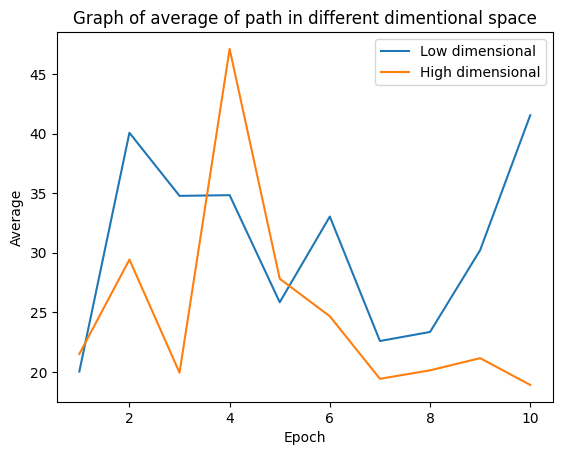

Static RRT OK


In [2]:
TestSum.test_rrt_loop()

In [ ]:
TestSum.test_dynamic_env()

frames = []
for t in range(300):
    image = imageio.v2.imread(f'./images/static{t}.png')
    frames.append(image)

imageio.mimsave('./static.gif', # output gif
            frames,          # array of input frames
            duration = 30)         # optional: frames per second

In [2]:
TestSum.test_dynamic_env_moving()

frames = []
for t in range(300):
    image = imageio.v2.imread(f'./images/moving{t}.png')
    frames.append(image)

imageio.mimsave('./moving.gif', # output gif
            frames,          # array of input frames
            duration = 30)         # optional: frames per second

Dynamic RRT with moving obstacles OK
